# Gun Violence Analysis

### Importing packages

In [632]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Reading Gun Voilence data

In [633]:
gun_Folder=pd.read_csv('gun-violence-data_01-2013_03-2018.csv',header=0, usecols = [1,2,3,14,16] )
df_gun =pd.DataFrame(gun_Folder)
city_state_folder = pd.read_csv('City_state.csv', header=0, usecols = [0,1])
df_location = pd.DataFrame(city_state_folder)
gun_state_groups = df_gun.sort_values(by=['state','date','city_or_county'])

### Sorting States and Cities based on Gun rules

In [634]:
states_list = pd.Series(df_location.loc[:,'State'])
city_list = pd.Series(df_location.loc[:,'City'])
df_state_filter = gun_state_groups[gun_state_groups['state'].isin(states_list)]
df_state_city_filter = df_state_filter[df_state_filter['city_or_county'].isin(city_list)]

In [635]:
s=df_state_city_filter['date'].apply(lambda x:x.split('-'))
df_state_city_filter['year']=s.apply(lambda x:x[0])
df_new=df_state_city_filter.fillna(0)

gunLaw_Categories = pd.read_csv('GunLaw_Categories.csv', header=0, usecols = [0,1])

df_merged= pd.merge(df_new, gunLaw_Categories, how = 'left', on ='state')
#print(df_merged)

df_merged1 = df_merged.groupby(['year','Categories'])['state'].count()
df_merged1

/Users/kavya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


year  Categories
2013  Prohibted       26
2014  Moderate       496
      No_Laws        399
      Prohibted     4892
2015  Moderate       568
      No_Laws        561
      Prohibted     4973
2016  Moderate       529
      No_Laws        502
      Prohibted     5485
2017  Moderate       518
      No_Laws        451
      Prohibted     5412
2018  Moderate       103
      No_Laws        124
      Prohibted     1109
Name: state, dtype: int64

### Finding average number of incidents

In [636]:
df_merged1 =df_merged1.unstack().T
df_merged1.loc['Prohibted'] /= 9*30
df_merged1.loc['Moderate'] /= 4 *13
df_merged1.loc['No_Laws'] /= 4*8
df_merged1 = df_merged1.drop('2013',axis=1)

### Plotting the Graph

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121ccd8d0>,
      dtype=object)

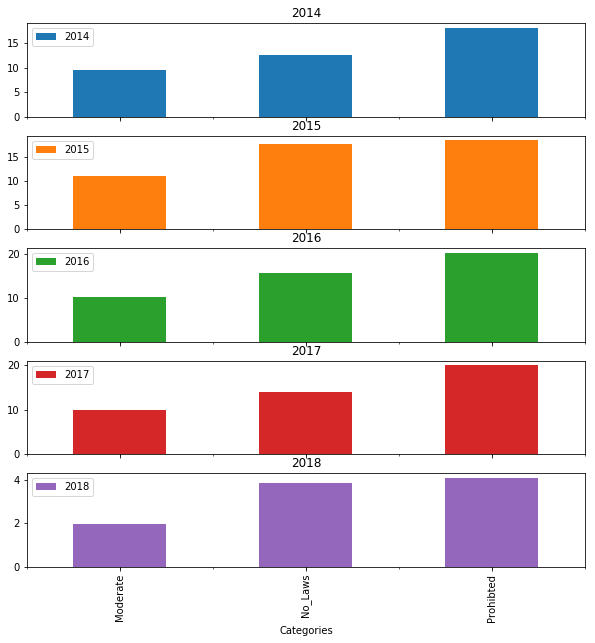

In [637]:
df_merged1.plot(kind='bar', subplots=True, figsize=(10,10) )